In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import svm
import pickle
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
import collections
from sklearn.externals import joblib
from mlxtend.plotting import plot_decision_regions

In [6]:
X_train=pd.read_excel("X_train.xlsx")
y_train=pd.read_excel("y_train.xlsx")

X_test=pd.read_excel("X_test.xlsx")
y_test=pd.read_excel("y_test.xlsx")

In [7]:
print(X_train.shape)
X_train.head()

(32615, 13)


,Para_First,Position,Length,Quote,Doc_First,FirstRel_Doc,FirstRel_Para,PageRankRel,CentroidVar_Uni,CentroidVar_Bi,FreqWord_Uni,FreqWord_Bi,SigTerm_Uni
0,1,1.000000,15,1.0,1,1.000000,1.000000,1.092140,0.247286,0.345769,0.811746,1.000000,0.802003
1,1,1.000000,14,1.0,0,0.000000,1.000000,0.791002,0.273988,0.370171,0.803571,1.000000,0.000000
2,0,0.500000,9,1.0,0,0.086066,0.089087,1.762937,0.312076,0.431832,0.562169,0.916667,0.000000
3,0,0.333333,13,1.0,0,0.071611,0.000000,0.804663,0.264028,0.368563,0.842308,1.000000,0.802003
4,1,1.000000,8,1.0,0,0.000000,1.000000,0.790716,0.350765,0.481579,0.718750,1.000000,0.000000


In [8]:
sm = BorderlineSMOTE(random_state=12,sampling_strategy='minority',n_jobs=-1)
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
collections.Counter(y_train_res)

Counter({1: 20252, 0: 20252})

In [10]:
scaler = preprocessing.MinMaxScaler()
print(scaler.fit(x_train_res))
x_train_res=scaler.transform(x_train_res)

MinMaxScaler(copy=True, feature_range=(0, 1))


In [11]:
tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]
model=GridSearchCV(svm.SVC(), tuned_parameters,  cv=5,scoring="f1",n_jobs=-1)

# model=svm.SVC(kernel='rbf')
model.fit(x_train_res, y_train_res)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'C': [0.0001, 0.01, 1, 100, 10000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [12]:
y_cap = model.predict(X_test)

In [13]:
metrics.f1_score(y_cap,y_test)

0.0054595086442220195

In [12]:
metrics.accuracy_score(y_cap,y_test)

0.6202663578459757

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


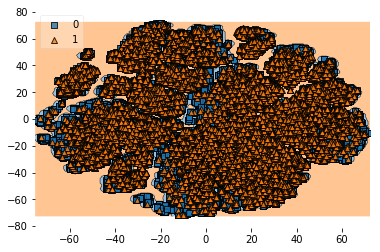

In [19]:
tsne_data=joblib.load('tsne data on borderline min max scale.sav')
plot_decision_regions(tsne_data, y_train_res,clf=svm.SVC().fit(tsne_data, y_train_res),legend=2)

In [14]:
filename = 'svm after upsampling the data with borderline.sav'
pickle.dump(model, open(filename, 'wb'))